In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests


# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Simple Thresholding**


Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding.

`cv2.threshold(image, 127(threshold value), 255( maximum value which is assigned to pixel), cv2.THRESH_BINARY)`

The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

1. **cv.THRESH_BINARY**
2. **cv.THRESH_BINARY_INV**
3. **cv.THRESH_TRUNC**
4. **cv.THRESH_TOZERO**
5. **cv.THRESH_TOZERO_INV**

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/Thresholding_methods.png)

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

The code yields this result:

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/threshold.jpg)

In [4]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/geo.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('geo.png', 'wb') as f:
    f.write(response.content)

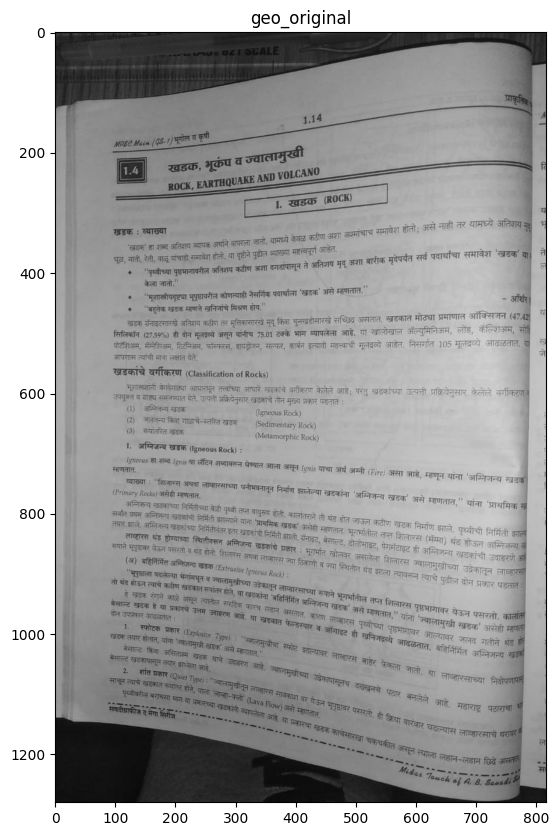

In [5]:
goe = cv2.imread("geo.png", 0)
imshow("geo_original", goe, 10)

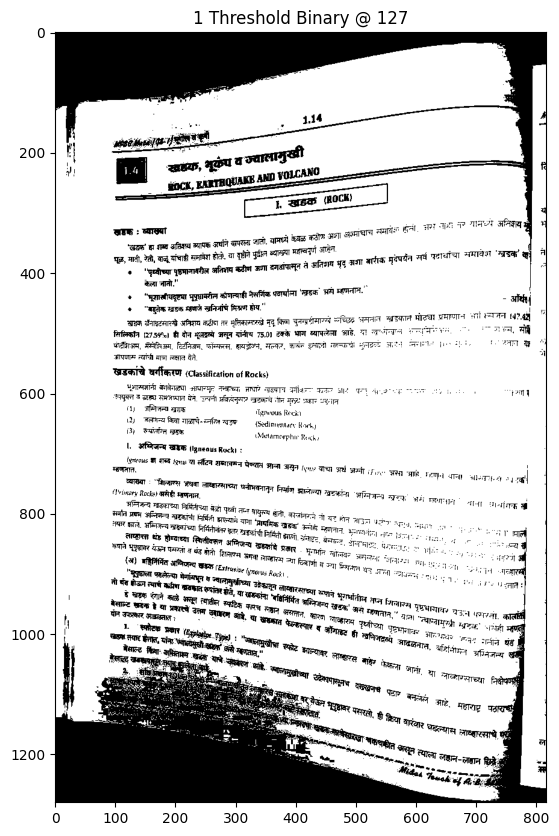

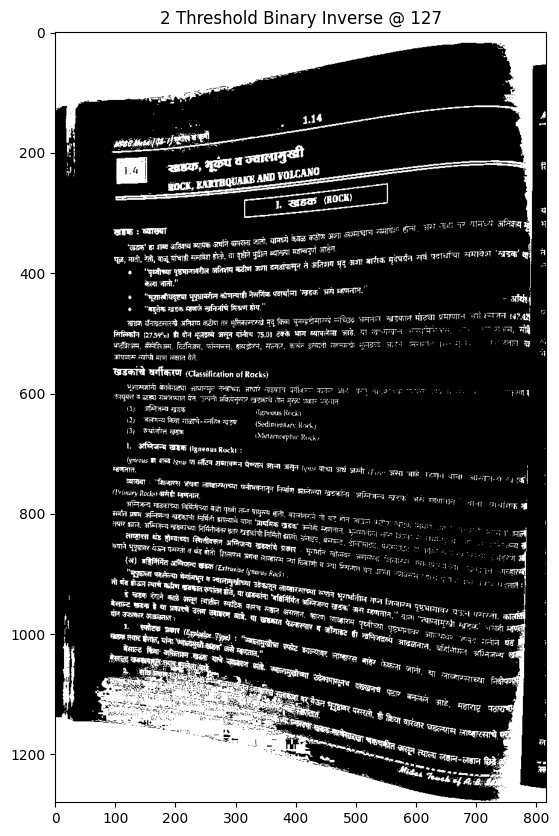

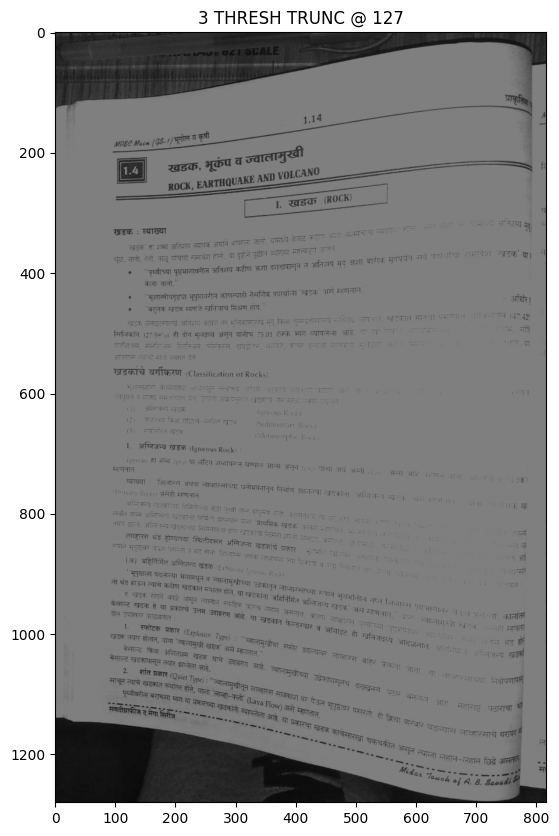

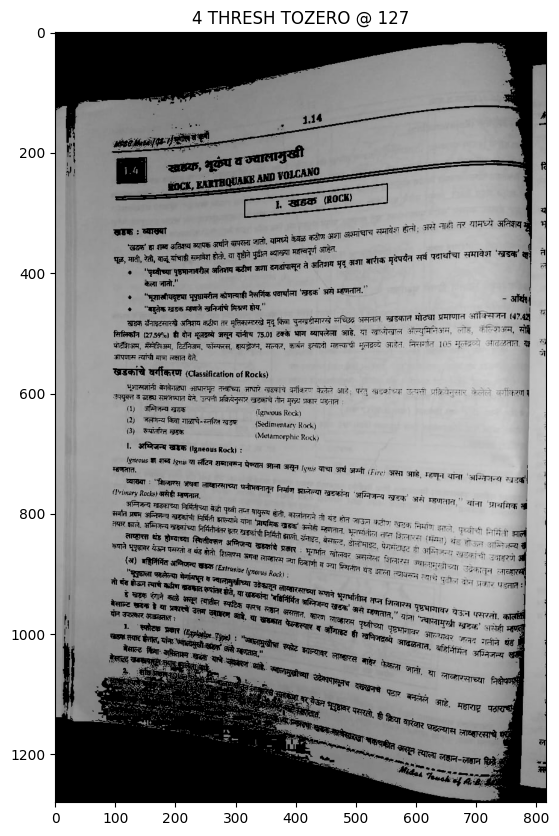

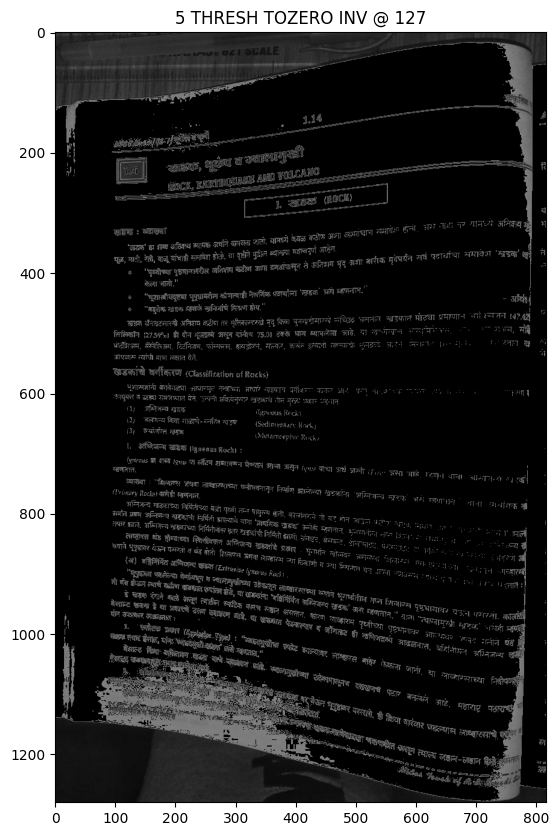

In [6]:
# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(goe, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(goe, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(goe, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged
ret,thresh4 = cv2.threshold(goe, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(goe, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

### **Adaptive Thresholding**

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

``cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


The adaptiveMethod decides how the threshold value is calculated:

`cv.ADAPTIVE_THRESH_MEAN_C`: The threshold value is the mean of the neighbourhood area minus the constant C.

`cv.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

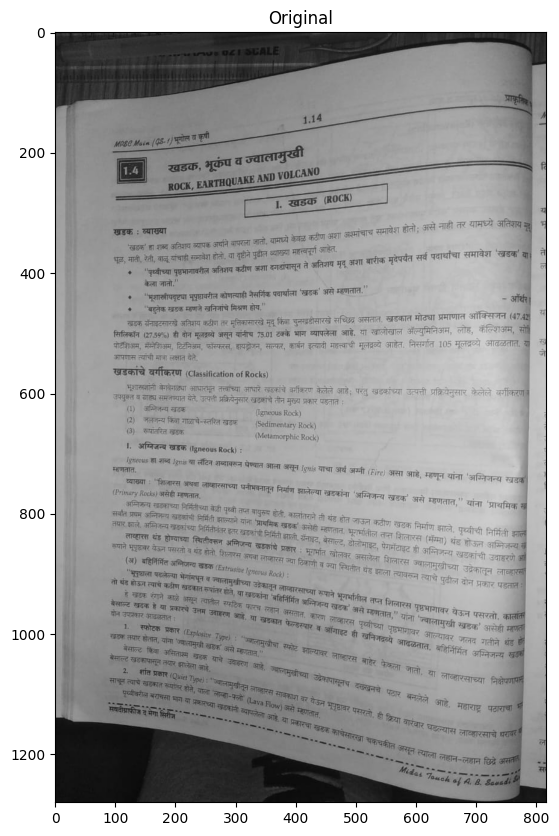

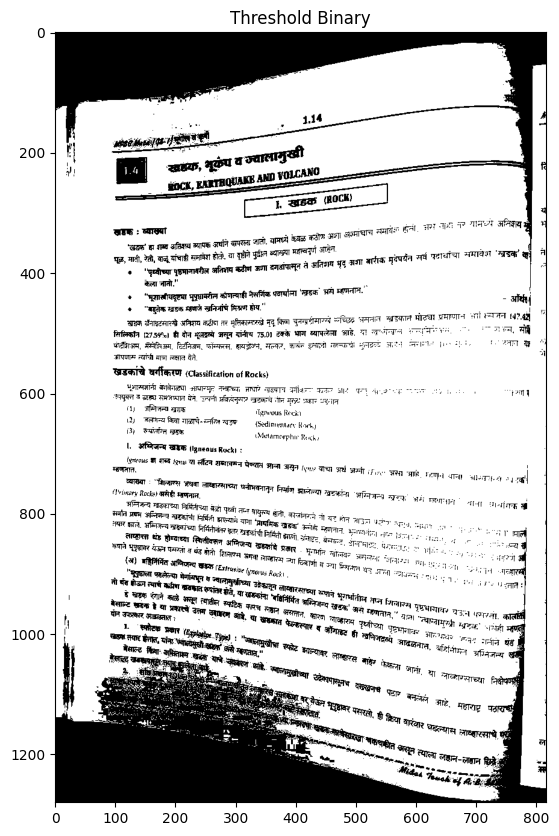

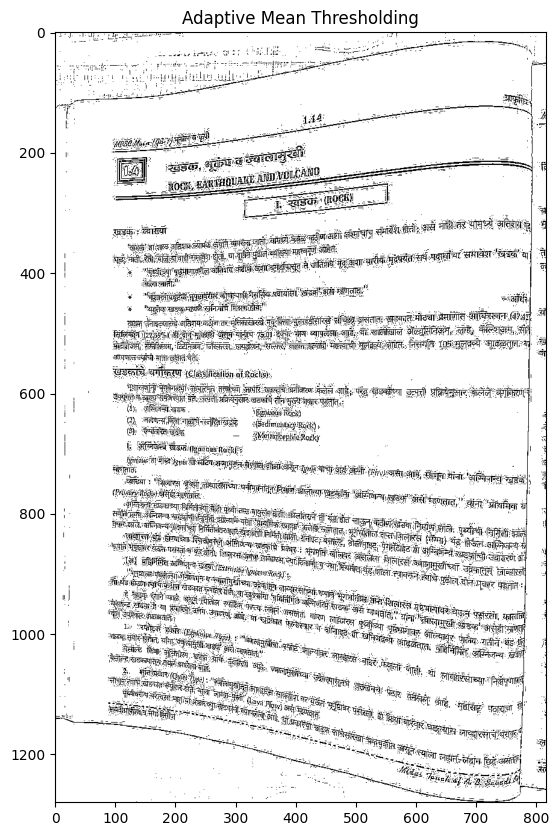

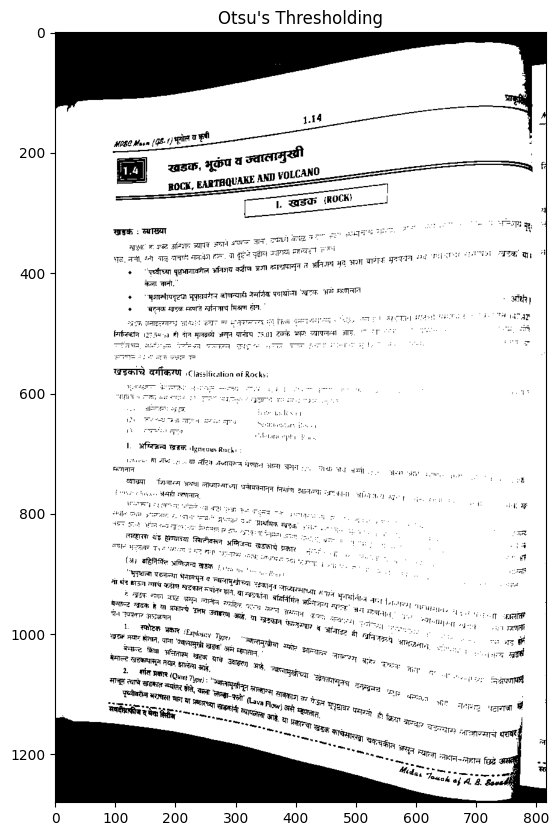

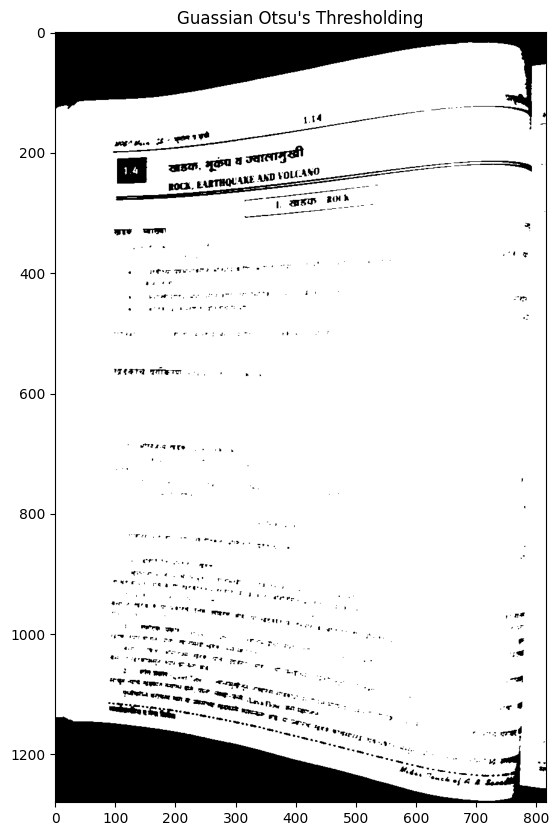

In [7]:
image = cv2.imread('geo.png',0)
imshow("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow("Adaptive Mean Thresholding", thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3)

### **SkImage Threshold Local**




``threshold_local(image, block_size, offset=10)``

The threshold_local function, calculates thresholds in regions with a characteristic size ``block_size`` surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an ``offset`` value

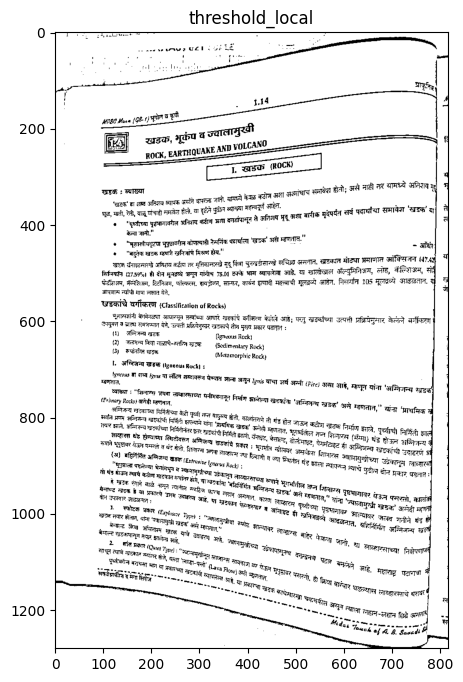

In [8]:
from skimage.filters import threshold_local

image = cv2.imread('geo.png')

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, 8)

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/otsu.jpg)





### **Dilation and Erosion**




- **Dilation**

Dilation is a technique where we expand the image. It adds the number of pixels to the boundaries of objects in an image. The structuring element controls it. The structuring element is a matrix of 1's and 0's.

*Structuring Element*

The size and shape of the structuring element define how many numbers of the pixel should be added or removed from the objects in an image.

It is a matrix of 1's and 0's. The center pixel of the image is called the origin.

It contains an image A with some kernel (B), which can have any shape or size, generally a square or circle. Here the kernel B has a defined anchor point. It is the center of the kernel.

In the next step, the kernel is overlapped over the image to calculate maximum pixel values. When the computation is completed, the image is replaced with an anchor at the center. The brighter areas increase in size that made increment in image size.

For example, the size of the object increases in the white shade; on the other side, the size of an object in black shades automatically decreases.

The dilation operation is performed by using the `cv2.dilate()` method.


- **Erosion**

Erosion is much similar to dilation. The difference is that the pixel value calculated minimum rather than the maximum in dilation. The image is replaced under the anchor point with that calculated minimum pixel. Unlikely dilation, the regions of darker shades increase. While it decreases in white shade or brighter side.

OpenCV provides `cv2.erode()` function to perform this operation.

In [9]:
# get image from github
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/rohit_sign.jpg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('rohit_sign.jpg', 'wb') as f:
    f.write(response.content)

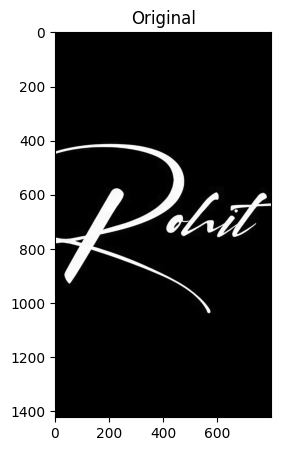

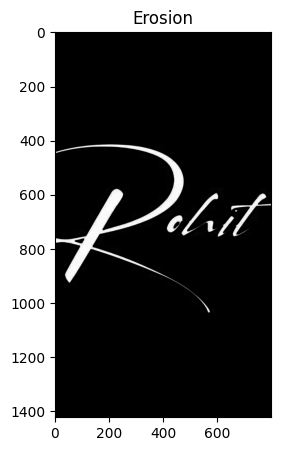

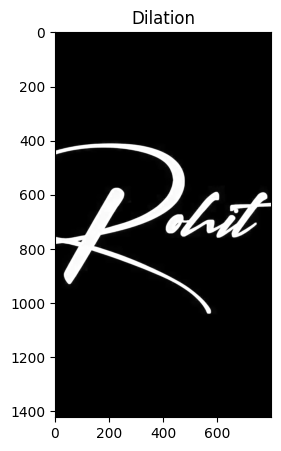

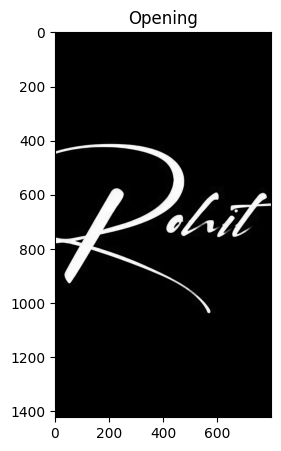

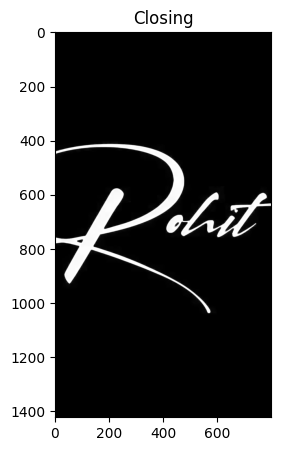

In [10]:
image = cv2.imread('rohit_sign.jpg', 0)
imshow('Original', image, 5)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion, 5)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation, 5)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening, 5)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing, 5)

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

## **Canny Edge Detection**

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/canny_edge_detection.png)

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/canny.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

In [11]:
# get image from github
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/pce.jpg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('pce.jpg', 'wb') as f:
    f.write(response.content)

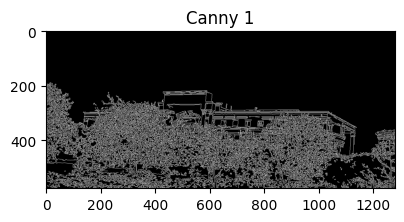

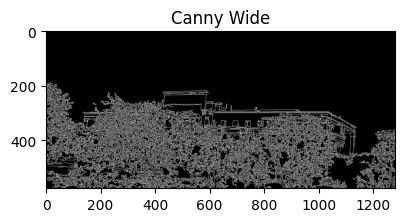

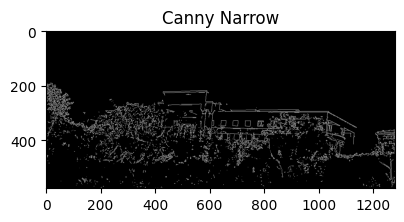

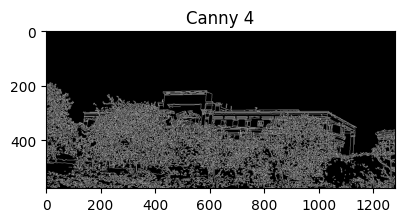

In [12]:
image = cv2.imread('pce.jpg',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge.
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

#### **Auto Canny**

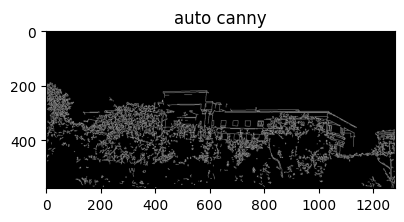

In [13]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)

## **Contours**

**What are contours?**

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
Since OpenCV 3.2, `findContours()` no longer modifies the source image.

In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [14]:
# get image from github
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/num.jpg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('num.jpg', 'wb') as f:
    f.write(response.content)

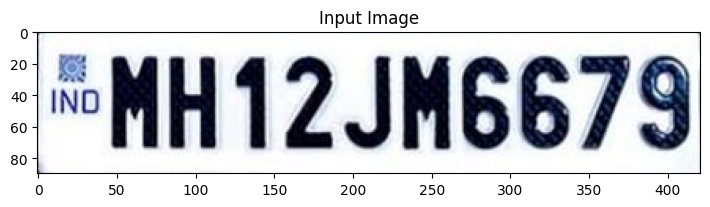

In [15]:
# Let's load a simple image license plate image
image = cv2.imread('num.jpg')
imshow('Input Image', image, 40)

**Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list.

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line


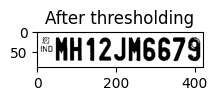

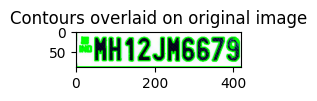

Number of Contours found = 39


In [16]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

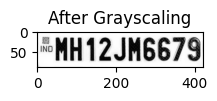

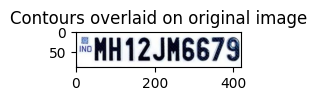

Number of Contours found = 1


In [17]:
# without threshold
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
#cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

#### **We can use Canny Edges instead of Thresholding**

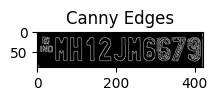

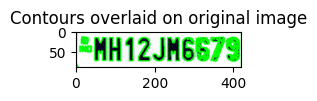

Number of Contours found = 128


In [18]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

## **Retreival Modes**

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html


This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

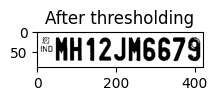

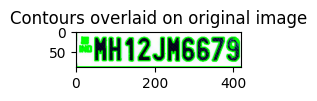

Number of Contours found = 39
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [-1 37 -1 -1]]]


In [19]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**
If you use this flag, it returns only extreme outer flags. All child contours are left behind. We can say, under this law, Only the eldest in every family is taken care of. It doesn't care about other members of the family :).

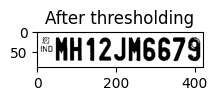

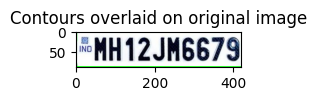

Number of Contours found = 1
[[[-1 -1 -1 -1]]]


In [20]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

Just consider the image of a "big white zero" on a black background. Outer circle of zero belongs to first hierarchy, and inner circle of zero belongs to second hierarchy.

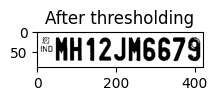

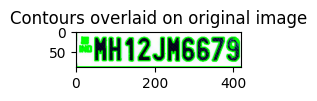

Number of Contours found = 39
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [-1 11 13 -1]
  [14 -1 -1 12]
  [15 13 -1 12]
  [16 14 -1 12]
  [17 15 -1 12]
  [18 16 -1 12]
  [19 17 -1 12]
  [20 18 -1 12]
  [21 19 -1 12]
  [22 20 -1 12]
  [23 21 -1 12]
  [24 22 -1 12]
  [25 23 -1 12]
  [26 24 -1 12]
  [27 25 -1 12]
  [28 26 -1 12]
  [29 27 -1 12]
  [30 28 -1 12]
  [31 29 -1 12]
  [32 30 -1 12]
  [33 31 -1 12]
  [34 32 -1 12]
  [35 33 -1 12]
  [36 34 -1 12]
  [37 35 -1 12]
  [38 36 -1 12]
  [-1 37 -1 12]]]


In [21]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
Mr.Perfect. It retrieves all the contours and creates a full family hierarchy list. It even tells, who is the grandpa, father, son, grandson and even beyond... :).

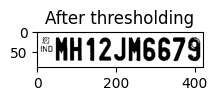

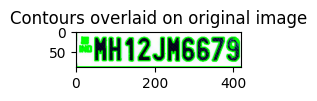

Number of Contours found = 39
[[[-1 -1  1 -1]
  [ 3 -1  2  0]
  [-1 -1 -1  1]
  [ 4  1 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [10  8 -1  0]
  [11  9 -1  0]
  [12 10 -1  0]
  [13 11 -1  0]
  [14 12 -1  0]
  [15 13 -1  0]
  [16 14 -1  0]
  [24 15 17  0]
  [18 -1 -1 16]
  [19 17 -1 16]
  [20 18 -1 16]
  [21 19 -1 16]
  [22 20 -1 16]
  [23 21 -1 16]
  [-1 22 -1 16]
  [26 16 25  0]
  [-1 -1 -1 24]
  [29 24 27  0]
  [28 -1 -1 26]
  [-1 27 -1 26]
  [31 26 30  0]
  [-1 -1 -1 29]
  [32 29 -1  0]
  [33 31 -1  0]
  [34 32 -1  0]
  [35 33 -1  0]
  [36 34 -1  0]
  [37 35 -1  0]
  [38 36 -1  0]
  [-1 37 -1  0]]]


In [22]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.

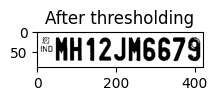

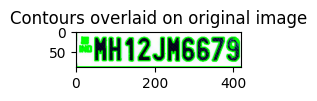

Number of Contours found = 39
1013
46
28
75
32
8
11
10
4
10
6
8
11
10
6
138
184
4
2
2
17
3
33
34
172
4
181
34
2
180
35
235
160
194
255
237
12
51
12


In [23]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

#### **CHAIN_APPROX_SIMPLE**

compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

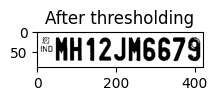

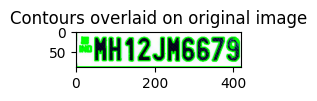

Number of Contours found = 39
11
10
6
30
10
8
7
9
4
8
6
8
9
8
6
29
71
4
2
2
9
3
13
16
83
4
70
23
2
72
21
63
32
85
38
55
10
30
10


In [24]:
image = cv2.imread('num.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
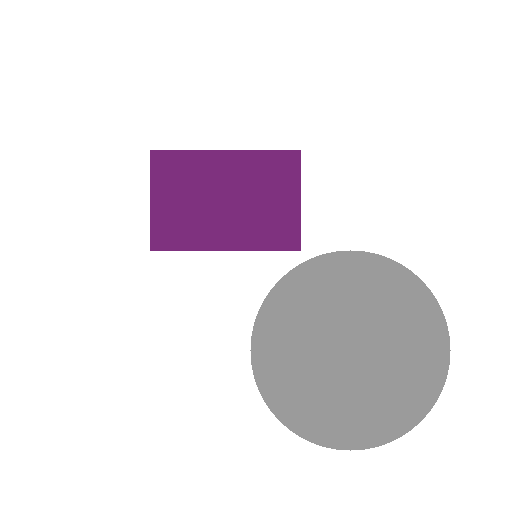

In [62]:
# Create a white image using numpy
image = np.ones((512, 512, 3), np.uint8) * 255
image

cv2.rectangle(image, (150, 150), (300, 250), (127, 50, 127), -1)
cv2.circle(image, (350, 350), 100, (155, 155, 155), -1)

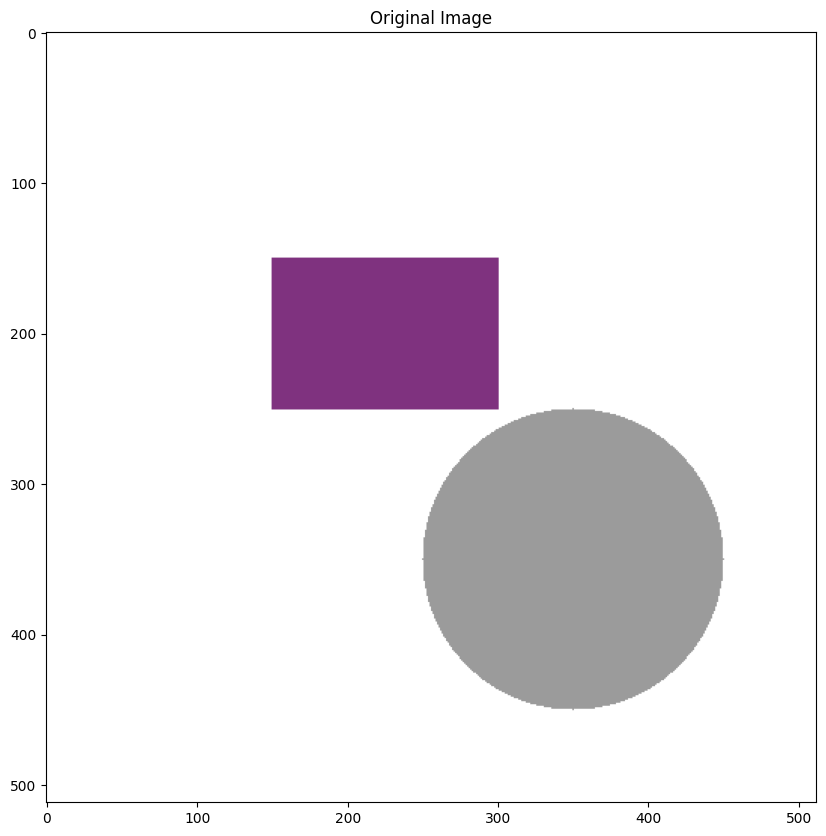

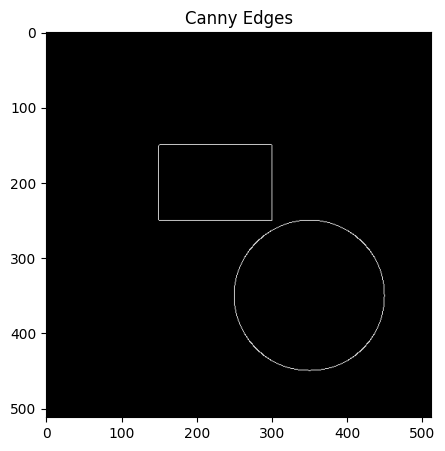

Number of contours found =  2


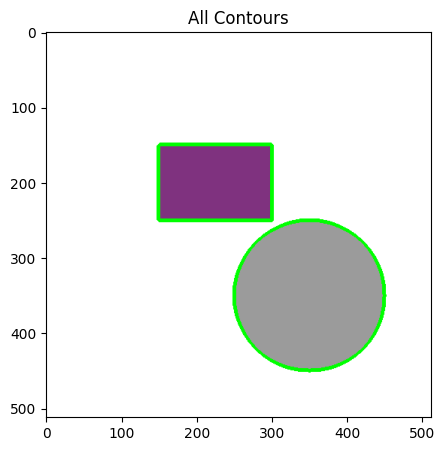

In [63]:
imshow('Original Image', image)

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
imshow('Canny Edges', edged, 5)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('All Contours', image, 5)

## **Sorting by Area using cv2.ContourArea and cv2.Moments**

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/moments.png)

Contor Areas before sorting...
[31460.0, 15248.0]
Contor Areas after sorting...
[31460.0, 15248.0]


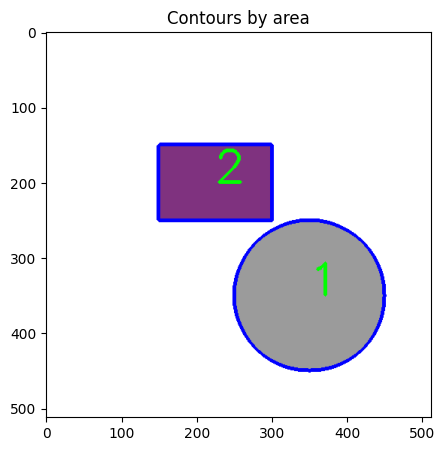

In [64]:
# Function we'll use to display contour area

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
# image = cv2.imread('obj.jpeg')

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting...")
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Contor Areas after sorting...")
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx = 0
        cy = 0
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image, 5)

#### **Define some functions we'll be using**

In [65]:
# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

#### **We use Moments to Calculate the Center and then use the X Cordinate to sort from left to right**

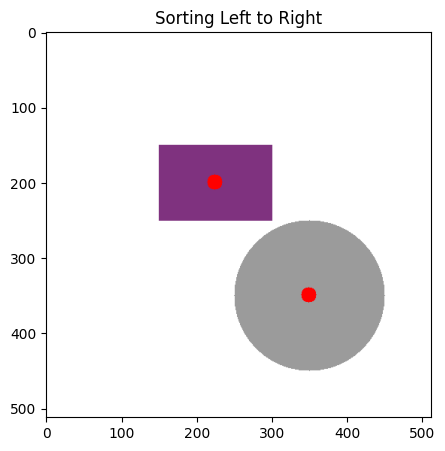

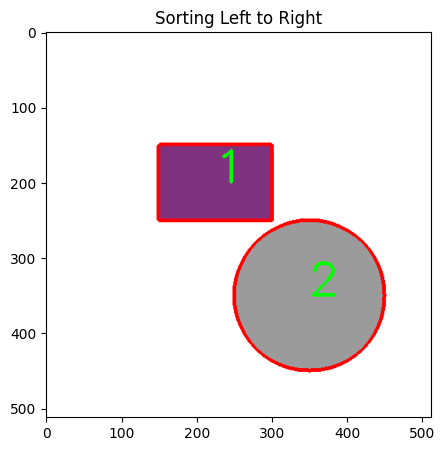

In [67]:
# Create a white image using numpy
image = np.ones((512, 512, 3), np.uint8) * 255
image

cv2.rectangle(image, (150, 150), (300, 250), (127, 50, 127), -1)
cv2.circle(image, (350, 350), 100, (155, 155, 155), -1)

orginal_image = image.copy()

# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)

# Showing the Contour centers
imshow("Sorting Left to Right", image, 5)

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)

imshow('Sorting Left to Right', orginal_image, 5)

## **Approximating Contours using ApproxPolyDP**

### **Using ApproxPolyDP to approximate contours as a more defined shape**
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


``cv2.approxPolyDP(contour, Approximation Accuracy, Closed)``
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed

In [69]:
# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/car.jpeg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('car.jpeg', 'wb') as f:
    f.write(response.content)

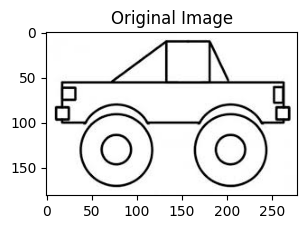

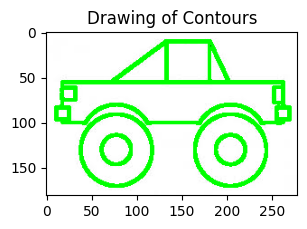

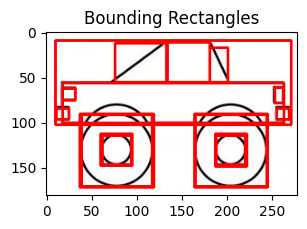

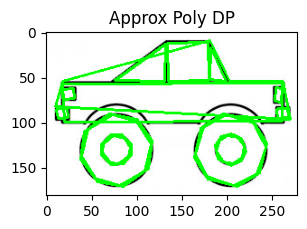

In [70]:
# Load image and keep a copy
image = cv2.imread('car.jpeg')

orig_image = image.copy()
imshow('Original Image', orig_image, 5)

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# Iterate through each contour
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow('Drawing of Contours', image, 5)
imshow('Bounding Rectangles', orig_image, 5)
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx Poly DP', copy, 5)

## **Convex Hull**

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/convex.png)

Convex Hull will look similar to contour approximation, but it is not (Both may provide the same results in some cases).

The ``cv2.convexHull()`` function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours

In [71]:
# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/man.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('man.png', 'wb') as f:
    f.write(response.content)

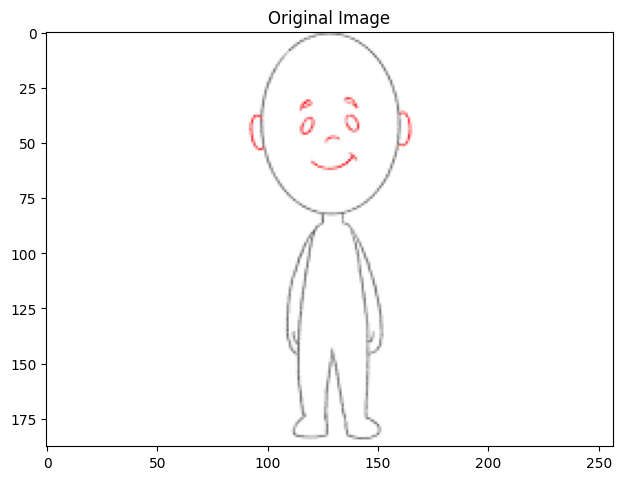

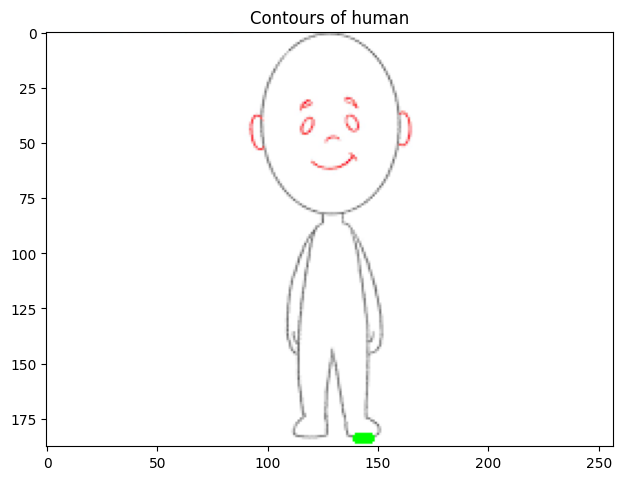

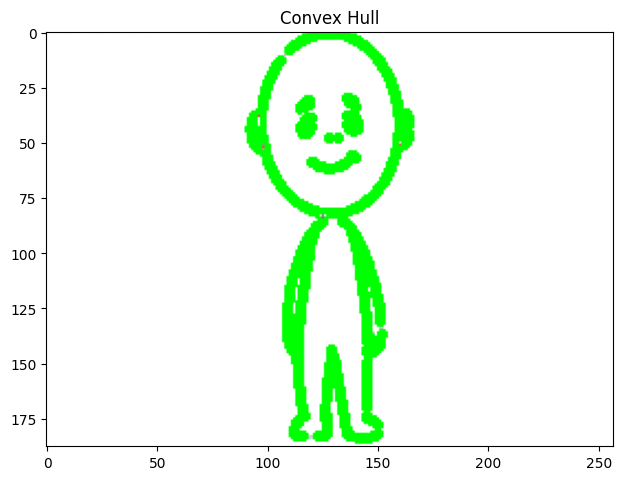

In [73]:
image = cv2.imread('man.png')
orginal_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow('Original Image', image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2)
imshow('Contours of human', image)


# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orginal_image, [hull], 0, (0, 255, 0), 2)

imshow('Convex Hull', orginal_image)

# **Matching Contours**
``cv2.matchShapes(contour template, contour, method, method parameter)``

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)

In [90]:
# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/star.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('star.png', 'wb') as f:
    f.write(response.content)

In [91]:
# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/star2.jpeg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('star2.jpeg', 'wb') as f:
    f.write(response.content)

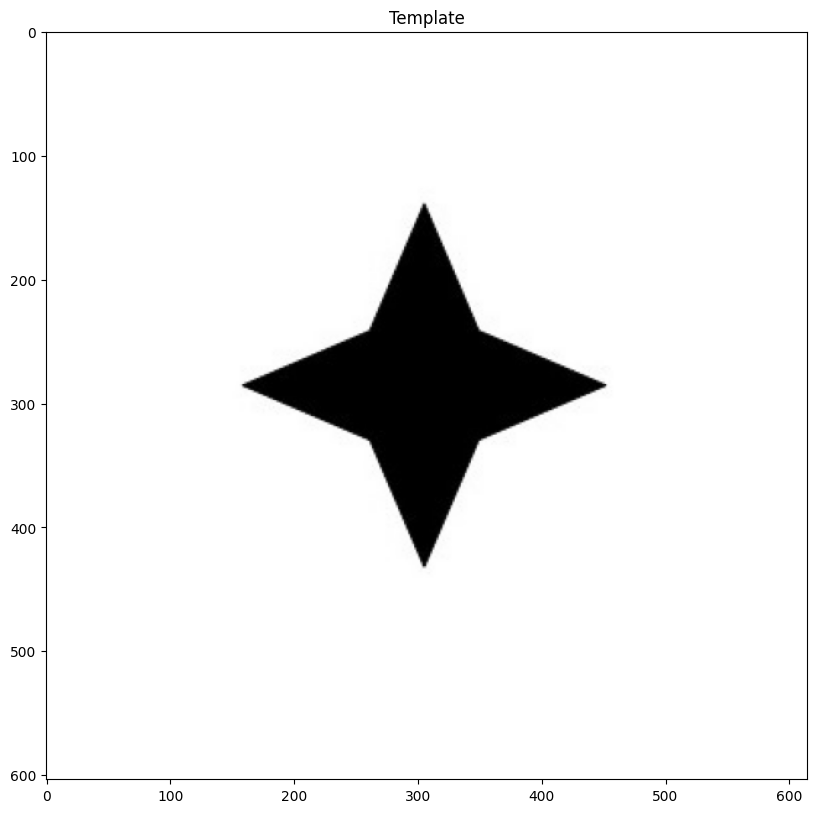

0.5156801098763629
0.2676851550133372
0.03151984519629371
0.10548949987824259
0.2479897055588391
0.5410628006926568
0.033162962334374345
0.246598491904373
0.5403866980015879
0.03286159944749534


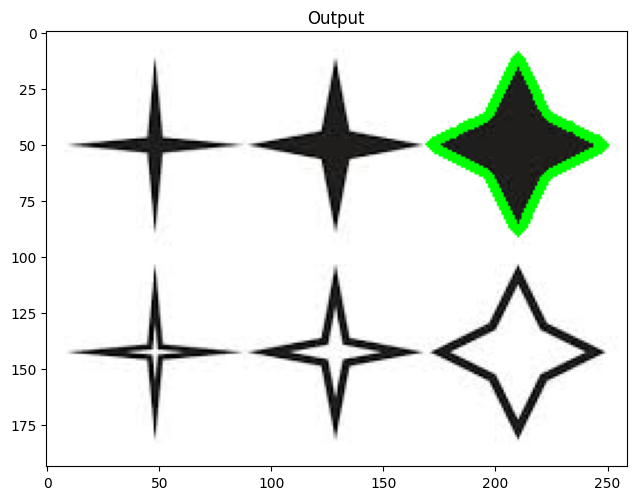

In [93]:
# Load the shape template or reference image
template = cv2.imread('star.png',0)
imshow('Template', template)

# Load the target image with the shapes we're trying to match
target = cv2.imread('star2.jpeg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []

cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
imshow('Output', target)